**Predicción sobre aparición de enfermedad cardíaca. 💟**

Generaremos un modelo de machine learning supervisado, en este caso escogimos random forest, para indicar la probabilidad de aparición de una enfermedad 
cardíaca en base a los factores de riesgo que presenta el individuo. El modelo luego se pondrá en producción usando Google Cloud y Streamlit.

**DataSet**

Usaremos un dataset denominado "dataset_heart_disease.csv", el cuál fue publicado en [Link](https://towardsdatascience.com/heart-disease-uci-diagnosis-prediction-b1943ee835a7) y posteriormente sometido a una normalización para poder 
utilizarlo para está demostración. Puedes encontrarlo en el siguiente enlace [Link](https://archive.ics.uci.edu/ml/datasets/Heart+Disease)

**Variables independientes**

-Age : Edad de la persona.

-Sex : Sexo de la persona (male, female).

-cp: Tipo de dolor de pecho de la persona (typical angina,atypical angina,non-anginal pain and asymptomatic) - (Angina típica, Angina atípica, Dolor no anginoso y Asintomático)

-trestbps: Presión de sangre de la persona en reposo en el momento de la admisión [mm/Hg ] (Valor min:80 ; max:120)

-chol: Colesterol de la persona en [mg/dl] (Valor min:120 ; Valor max:200)

-fbs: Glucemia de la persona en ayunas. (Si es > 120 mg/dl, 1 = Verdadero; 0 = Falso).

-restecg: Resultados electrocardiográficos de la persona en reposo. (Valores: Normal,having ST-T wave abnormality,showing probable or definite left ventricular hypertrophy):

-thalach: Frecuencia cardíaca máxima alcanzada de la persona. (El ritmo normal en reposo es de 60 a 100 pulsaciones por minuto)

-exang: Angina inducida por el ejercicio. (Valores: Yes-No)

-Oldpeak = Depresión del ST inducida por el ejercicio en relación con el reposo.

-slope: Pendiente máxima del segmento ST en ejercicio.(Valores: Upsloping, flat, downsloping)

-ca: Número de vasos principales coloreados por fluoroscopia (Valores: 0-3).

-thal: Indica un trastorno de la sangre llamado Talasemia.
Valores:
-fixed defect (no blood flow in some part of the heart): Defecto fijo. Ausencia de flujo sanguíneo en alguna parte del corazón
-normal blood flow: Flujo normal de sangre
-reversible defect (a blood flow is observed but it is not normal): Defecto reversible (se observa un flujo sanguíneo pero no es normal).

**Variable dependiente(Target)**

-target : Variable a predecir. Si tiene o no enfermedad del corazón.(Valores: 0 = no, 1 = yes)

**Paso 1: instalación scikit-learn**

In [119]:
!pip install scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


**Paso 2: importamos librerías**

In [118]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier
import pandas as pd
import pickle
from sklearn.model_selection import train_test_split
import sklearn
sklearn.__version__
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

**Paso 3: cargamos dataset**

In [120]:
df = pd.read_csv("/content/dataset_heart_disease.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,Male,Typical angina,125,212,0,ST-T Wave abnormality,168,Yes,1.0,Downsloping,2,Reversible defect,0
1,53,Male,Typical angina,140,203,1,Normal,155,No,3.1,Upsloping,0,Reversible defect,0
2,70,Male,Typical angina,145,174,0,ST-T Wave abnormality,125,No,2.6,Upsloping,0,Reversible defect,0
3,61,Male,Typical angina,148,203,0,ST-T Wave abnormality,161,Yes,0.0,Downsloping,1,Reversible defect,0
4,62,Female,Typical angina,138,294,1,ST-T Wave abnormality,106,Yes,1.9,Flat,3,Normal blood flow,0


In [121]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   object 
 2   cp        1025 non-null   object 
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   object 
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   object 
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   object 
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   object 
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(7), object(6)
memory usage: 112.2+ KB


In [122]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1025.0,54.434146,9.072290,29.0,48.0,56.0,61.0,77.0
trestbps,1025.0,131.611707,17.516718,94.0,120.0,130.0,140.0,200.0
chol,1025.0,246.000000,51.592510,126.0,211.0,240.0,275.0,564.0
fbs,1025.0,0.149268,0.356527,0.0,0.0,0.0,0.0,1.0
thalach,1025.0,149.114146,23.005724,71.0,132.0,152.0,166.0,202.0
oldpeak,1025.0,1.071512,1.175053,0.0,0.0,0.8,1.8,6.2
ca,1025.0,0.754146,1.030798,0.0,0.0,0.0,1.0,4.0
target,1025.0,0.513171,0.500070,0.0,0.0,1.0,1.0,1.0


In [123]:
dummies = pd.get_dummies(df[['sex','exang']],drop_first=True)
df = pd.concat([df.drop(['sex','exang'],axis=1), dummies],axis=1)
df

,age,cp,trestbps,chol,fbs,restecg,thalach,oldpeak,slope,ca,thal,target,sex_Male,exang_Yes
0,52,Typical angina,125,212,0,ST-T Wave abnormality,168,1.0,Downsloping,2,Reversible defect,0,1,1
1,53,Typical angina,140,203,1,Normal,155,3.1,Upsloping,0,Reversible defect,0,1,0
2,70,Typical angina,145,174,0,ST-T Wave abnormality,125,2.6,Upsloping,0,Reversible defect,0,1,0
3,61,Typical angina,148,203,0,ST-T Wave abnormality,161,0.0,Downsloping,1,Reversible defect,0,1,1
4,62,Typical angina,138,294,1,ST-T Wave abnormality,106,1.9,Flat,3,Normal blood flow,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,Atypical angina,140,221,0,ST-T Wave abnormality,164,0.0,Downsloping,0,Normal blood flow,1,1,0
1021,60,Typical angina,125,258,0,Normal,141,2.8,Flat,1,Reversible defect,0,1,0
1022,47,Typical angina,110,275,0,Normal,118,1.0,Flat,1,Normal blood flow,0,1,0
1023,50,Typical angina,110,254,0,Normal,159,0.0,Downsloping,0,Normal blood flow,1,0,1


In [124]:
label_encoder = preprocessing.LabelEncoder()

df['cp'] = label_encoder.fit_transform(df['cp'])
df['restecg'] = label_encoder.fit_transform(df['restecg']) 
df['slope'] = label_encoder.fit_transform(df['slope']) 
df['thal'] = label_encoder.fit_transform(df['thal']) 

In [125]:
df

,age,cp,trestbps,chol,fbs,restecg,thalach,oldpeak,slope,ca,thal,target,sex_Male,exang_Yes
0,52,3,125,212,0,2,168,1.0,0,2,3,0,1,1
1,53,3,140,203,1,1,155,3.1,2,0,3,0,1,0
2,70,3,145,174,0,2,125,2.6,2,0,3,0,1,0
3,61,3,148,203,0,2,161,0.0,0,1,3,0,1,1
4,62,3,138,294,1,2,106,1.9,1,3,2,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,140,221,0,2,164,0.0,0,0,2,1,1,0
1021,60,3,125,258,0,1,141,2.8,1,1,3,0,1,0
1022,47,3,110,275,0,1,118,1.0,1,1,2,0,1,0
1023,50,3,110,254,0,1,159,0.0,0,0,2,1,0,1


In [126]:
# Obtenemos variables independientes

X = df.drop(columns='target')
X

,age,cp,trestbps,chol,fbs,restecg,thalach,oldpeak,slope,ca,thal,sex_Male,exang_Yes
0,52,3,125,212,0,2,168,1.0,0,2,3,1,1
1,53,3,140,203,1,1,155,3.1,2,0,3,1,0
2,70,3,145,174,0,2,125,2.6,2,0,3,1,0
3,61,3,148,203,0,2,161,0.0,0,1,3,1,1
4,62,3,138,294,1,2,106,1.9,1,3,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,140,221,0,2,164,0.0,0,0,2,1,0
1021,60,3,125,258,0,1,141,2.8,1,1,3,1,0
1022,47,3,110,275,0,1,118,1.0,1,1,2,1,0
1023,50,3,110,254,0,1,159,0.0,0,0,2,0,1


In [127]:
# Obtenemos la variable dependiente (Target)

Y = df.pop('target')
Y

0       0
1       0
2       0
3       0
4       0
       ..
1020    1
1021    0
1022    0
1023    1
1024    0
Name: target, Length: 1025, dtype: int64

In [128]:
# Separamos los datos de entrenamiento y prueba 

X_train,X_test,y_train,y_test = train_test_split(X, Y, train_size=0.8, test_size=0.2, random_state=100)

**Paso 4: creamos el modelo, los entrenamos y lo guardamos**

In [129]:
arbol_de_decision = DecisionTreeClassifier(random_state = 42)
arbol_de_decision.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [130]:
# Grabamos el modelo en el directorio
pkl_filename = "pickle_model.pkl"
with open(pkl_filename, 'wb') as file:
    pickle.dump(arbol_de_decision, file)

In [131]:
# Cargamos el modelo
pkl_filename = "pickle_model.pkl"
with open(pkl_filename, 'rb') as file:
    arbol_de_decision = pickle.load(file)

**Paso 5: realizamos la predicción para train y test**

In [114]:
y_train_pred = arbol_de_decision.predict(X_train)
y_test_pred = arbol_de_decision.predict(X_test)

**Paso 6: evaluamos el desempeño del modelo**

In [132]:
# Encontramos el accuracy promedio usando datos de test

train_accuracy_arbol_dec = accuracy_score(y_train, y_train_pred)
test_accuracy_arbol_dec = accuracy_score(y_test, y_test_pred)
print(f'El % de aciertos sobre el set de entrenamiento del árbol de decisión: {round(train_accuracy_arbol_dec,2)}%')
print(f'El % de aciertos sobre el set de evaluación del árbol de decisión: {round(test_accuracy_arbol_dec,2)}%')

El % de aciertos sobre el set de entrenamiento del árbol de decisión: 1.0%
El % de aciertos sobre el set de evaluación del árbol de decisión: 1.0%


**Paso 7: visualizamos la matriz de confusión**

Matriz de Confusión del árbol de decisión:
[[ 97   0]
 [  0 108]]


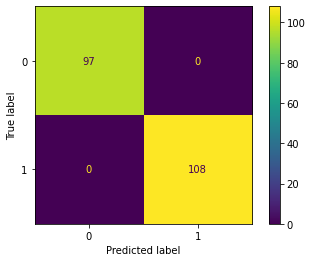

In [116]:
matriz_arbol_dec = confusion_matrix(y_test, y_test_pred)
print('Matriz de Confusión del árbol de decisión:')
print(matriz_arbol_dec)
disp = ConfusionMatrixDisplay(confusion_matrix=matriz_arbol_dec)
disp.plot()

plt.show()

**Paso 8: probamos con una muestra nueva**

In [133]:
x_in = np.asarray([52, 1, 3, 125, 212, 0, 2, 168, 1, 1.0, 0, 2, 2]).reshape(1,-1)

predicts = arbol_de_decision.predict(x_in)
predicts[0]

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"


0